<a href="https://colab.research.google.com/github/james-t-little/bachelors_dissertation/blob/main/Image_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import os
import random
import PIL
from google.colab import drive
from PIL import Image, ImageOps
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Conv2D, Input, concatenate, Conv2DTranspose, Dropout, BatchNormalization
from keras.layers.convolutional import MaxPooling2D
from keras import regularizers, optimizers
import keras
from keras.models import Model
from tensorflow.keras.optimizers import Adam

AUTOTUNE = tf.data.experimental.AUTOTUNE

In [17]:
IMG_SIZE = 512

drive.mount('/content/drive')

path = '/content/drive/MyDrive/dissertation_seg_data'

input_path = os.path.join(path,"input_resize_patches/")

mask_path = os.path.join(path,"mask_resize_patches/")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
image_path = [ os.path.join(mask_path, fname) for fname in os.listdir(mask_path) if fname.endswith(".png") ]

In [39]:
img = Image.open(image_path[6000]).convert('L')

In [40]:
for i in np.array(img):
    print(i)
    print('\n')

Streaming output truncated to the last 5000 lines.
  76  76  76  76  76  76  76  76  76  76  76  76  76  76  76  76  76  76
  76  76  76  76  76  76  76  76  76  76  76  76  76  76  76  76  76  76
  76  76  76  76  76  76  76  76  76  76  76  76  76  76  76  76  76  76
  76  76  76  76  76  76  76  76  76  76  76  76  76  76  76  76  76  76
  76  76  76 166 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 142  29  29  29  29  29  29  29  29  29  29  29  29  29  29
  29  29  29  29  29  29  29  29]


[ 76  76  76  76  76  76  76  76  76  76  76  76 132 253 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 142  29  29  29
  29  29  29  29  29  29  29  29  29  29  29  29  29  29  29  29  29  29
  29  29  29  29  29  29  29  29  29  29  29  29  29  29  29  29  29  29
  29  29  29  29  29  29  29  29  29  44 240 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 

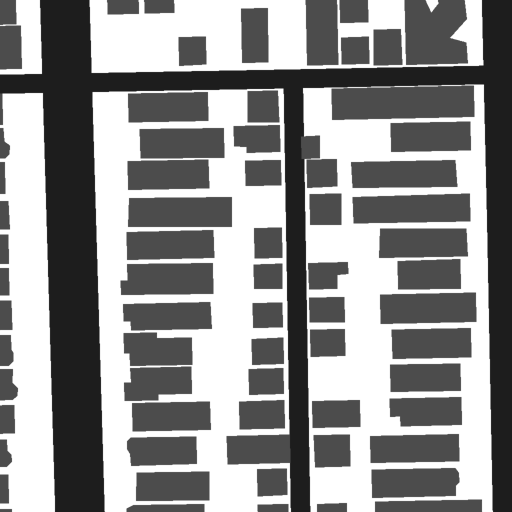

In [41]:
img

2